In [13]:
# What this does: Brings in tools we need
# Think of it like opening your toolbox before starting work

import pandas as pd                    # For handling data (like Excel)
import numpy as np                      # For math operations
import matplotlib.pyplot as plt         # For making graphs
import seaborn as sns                   # For pretty graphs
from sklearn.decomposition import PCA   # The PCA tool itself
from sklearn.preprocessing import StandardScaler  # To normalize data
import warnings
warnings.filterwarnings('ignore')       # Hide warning messages

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [14]:
# Load your current 9-feature dataset (the one you used for ML)
df = pd.read_csv('../Datasets/Placement_Dataset_Preprocessed.csv')  # Or whatever your preprocessed file is called


X = df.drop('Package_Category', axis=1)
y = df['Package_Category']


print(f"✅ Data loaded: {X.shape}")
print(f"Features: {list(X.columns)}")


✅ Data loaded: (401, 9)
Features: ['10th marks', '12th marks', 'Cgpa', 'Internships(Y/N)', 'Training(Y/N)', 'Innovative Project(Y/N)', 'Communication level', 'Technical Course(Y/N)', 'Technical_Skills_Score']


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Data standardized!")


✅ Data standardized!


In [16]:
pca = PCA(n_components=X.shape[1])
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print(f"✅ PCA complete!")
for i, var in enumerate(explained_var, 1):
    print(f"PC{i}: {var*100:.2f}%")

n_95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"\n📊 Components for 95% variance: {n_95}/9")


✅ PCA complete!
PC1: 21.13%
PC2: 15.44%
PC3: 11.61%
PC4: 11.48%
PC5: 10.35%
PC6: 9.40%
PC7: 8.89%
PC8: 7.01%
PC9: 4.69%

📊 Components for 95% variance: 8/9


✅ Saved: pca_analysis.png


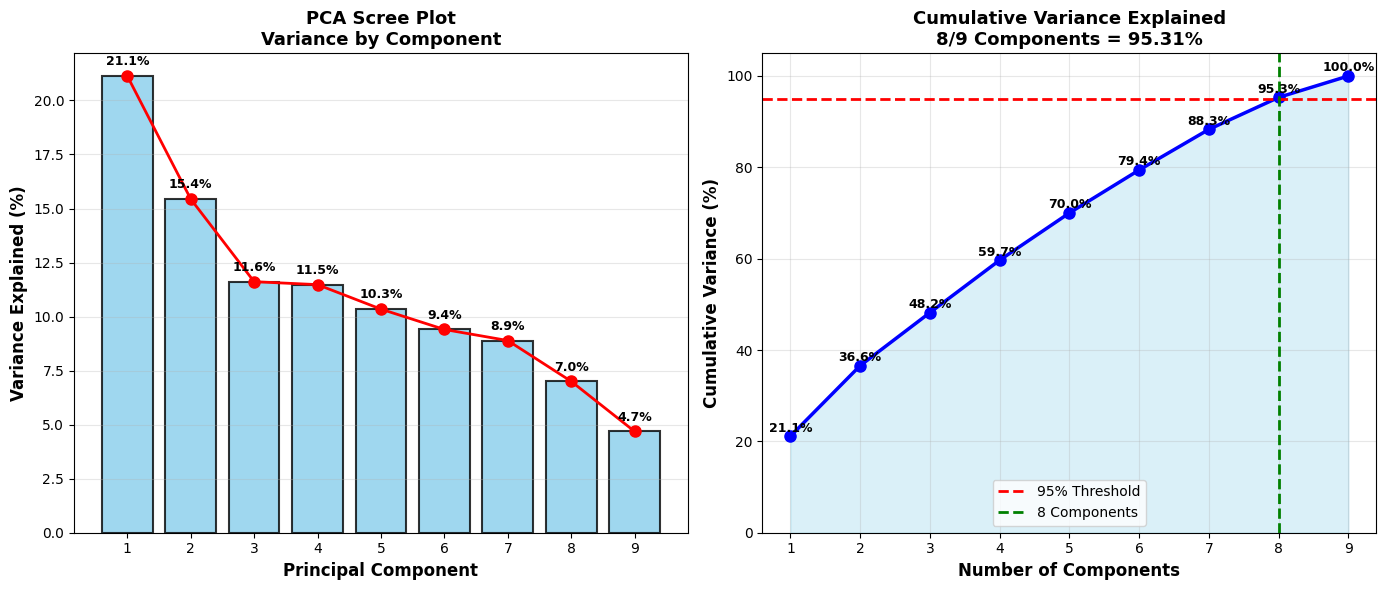

In [17]:
# Cell 5: Scree Plot and Cumulative Variance Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# LEFT PLOT: Scree Plot (Individual Variance)
ax1.bar(range(1, 10), explained_var * 100, color='skyblue', 
        edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.plot(range(1, 10), explained_var * 100, 'ro-', 
         linewidth=2, markersize=8)

# Add percentage labels on bars
for i, v in enumerate(explained_var * 100):
    ax1.text(i+1, v+0.5, f'{v:.1f}%', ha='center', 
             fontweight='bold', fontsize=9)

ax1.set_xlabel('Principal Component', fontsize=12, fontweight='bold')
ax1.set_ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
ax1.set_title('PCA Scree Plot\nVariance by Component', 
              fontsize=13, fontweight='bold')
ax1.set_xticks(range(1, 10))
ax1.grid(alpha=0.3, axis='y')

# RIGHT PLOT: Cumulative Variance
ax2.plot(range(1, 10), cumulative_var * 100, 'bo-', 
         linewidth=2.5, markersize=8)
ax2.axhline(95, color='red', linestyle='--', linewidth=2, 
            label='95% Threshold')
ax2.axvline(8, color='green', linestyle='--', linewidth=2, 
            label='8 Components')
ax2.fill_between(range(1, 10), cumulative_var * 100, 
                  alpha=0.3, color='skyblue')

# Add percentage labels
for i, v in enumerate(cumulative_var * 100):
    ax2.text(i+1, v+1, f'{v:.1f}%', ha='center', 
             fontweight='bold', fontsize=9)

ax2.set_xlabel('Number of Components', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Variance (%)', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Variance Explained\n8/9 Components = 95.31%', 
              fontsize=13, fontweight='bold')
ax2.set_xticks(range(1, 10))
ax2.set_ylim([0, 105])
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: pca_analysis.png")
plt.show()


✅ 2D PCA complete!
Variance captured by 2D: 36.57%
✅ Saved: pca_2d_visualization.png


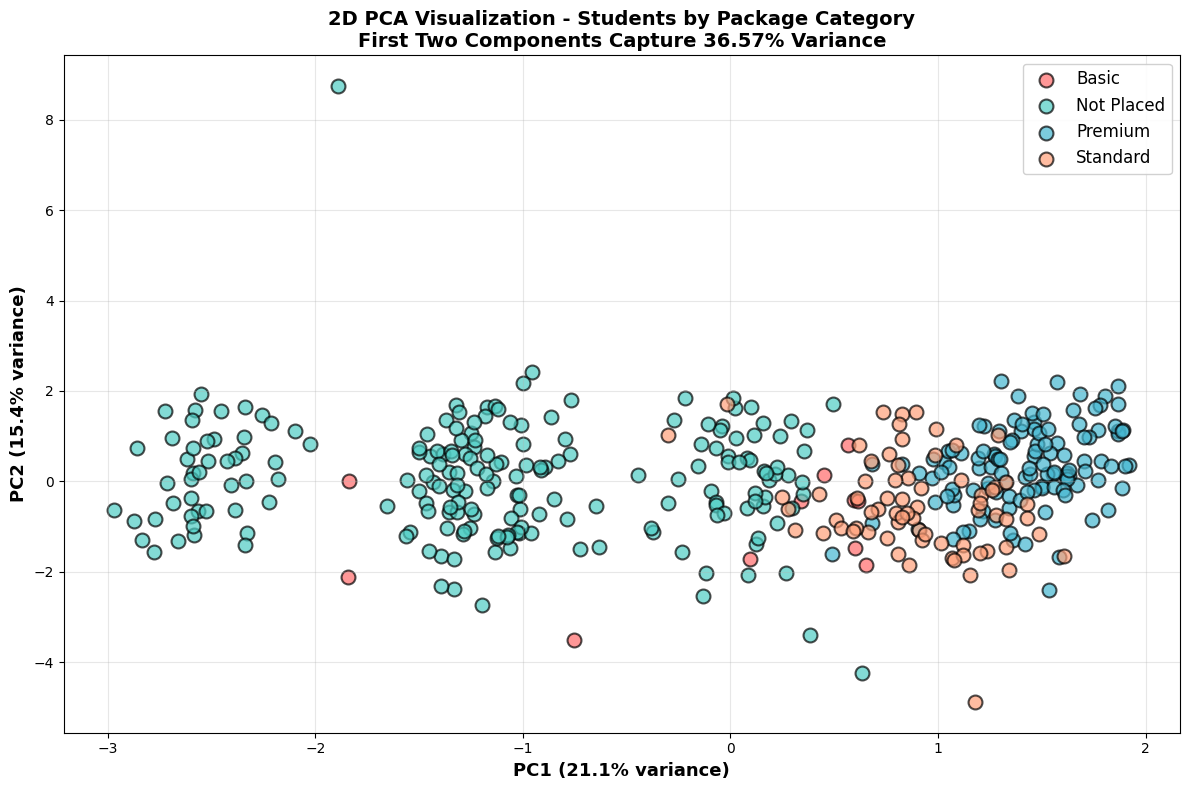

In [18]:
# Cell 6: 2D PCA Visualization (Colored by Package Category)
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

print(f"✅ 2D PCA complete!")
print(f"Variance captured by 2D: {pca_2d.explained_variance_ratio_.sum()*100:.2f}%")

plt.figure(figsize=(12, 8))

# Define colors and labels for each package category
colors = {0: '#FF6B6B', 1: '#4ECDC4', 2: '#45B7D1', 3: '#FFA07A'}
labels = {0: 'Basic', 1: 'Not Placed', 2: 'Premium', 3: 'Standard'}

# Plot each category
for cat in range(4):
    mask = y == cat
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
               c=colors[cat], label=labels[cat], 
               s=100, alpha=0.7, edgecolors='black', linewidth=1.5)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)', 
          fontsize=13, fontweight='bold')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)', 
          fontsize=13, fontweight='bold')
plt.title('2D PCA Visualization - Students by Package Category\nFirst Two Components Capture 36.57% Variance', 
         fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='best', framealpha=0.9)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig('pca_2d_visualization.png', dpi=300, bbox_inches='tight')
print("✅ Saved: pca_2d_visualization.png")
plt.show()
